In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = np.genfromtxt('./data5-1.csv', delimiter=',')
data

array([70195., 37974., 60233., ..., 62871., 22912., 27939.])

In [9]:
data.max()

109837.0

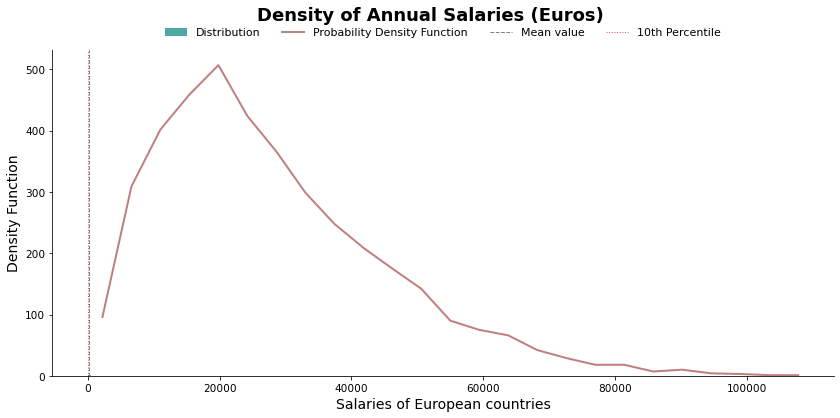

In [10]:
# Creating a wide figure to accomodate the distribution.
fig = plt.figure(figsize=(14,6))


n_bins = 25


hist, bin_edges = np.histogram(data, bins=n_bins, range=[0, 110000.0])
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

pdf_mean = np.mean(hist)
X = np.percentile(hist, 10)

plt.hist(hist, bins=n_bins, alpha=0.68, color='teal', label='Distribution')
plt.plot(bin_centers, hist, color='maroon', linewidth=2, alpha=0.5, label='Probability Density Function')
plt.axvline(pdf_mean, color='gray', linewidth=1, linestyle='dashed', label='Mean value')
plt.axvline(X, color='red', linewidth=1, alpha=0.7, linestyle='dotted', label='10th Percentile')


# text = f'<=Mean: {mean_val: .2f}'
text_percentile = f'<=X(10th_percentile): {X: .2f}'
# plt.text(mean_val+0.01, y=300, s=text, fontsize=11.5)
# plt.text(X+0.008, y=250, s=text_percentile, fontsize=11.5)

plt.xlabel('Salaries of European countries', fontsize=14)
plt.ylabel('Density Function', fontsize=14)
plt.suptitle('Density of Annual Salaries (Euros)', fontsize=18, fontweight='bold')
plt.legend(frameon=False, fontsize=11, ncols=4, loc='upper center', borderaxespad=-2.4)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ticks = [0, 0, 20000, 40000, 60000, 80000, 10000]
# ax.set_xticklabels(labels=ticks)
ax.tick_params(labelsize=10.5)


plt.show()

In [17]:
hist, bin_edges = np.histogram(data, bins=25, range=[0, 110000.0])
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1:] - bin_edges[:-1]

bin_width * 0.9

array([3960., 3960., 3960., 3960., 3960., 3960., 3960., 3960., 3960.,
       3960., 3960., 3960., 3960., 3960., 3960., 3960., 3960., 3960.,
       3960., 3960., 3960., 3960., 3960., 3960., 3960.])

In [15]:
bin_edges[1:] - bin_edges[:-1]

array([4400., 4400., 4400., 4400., 4400., 4400., 4400., 4400., 4400.,
       4400., 4400., 4400., 4400., 4400., 4400., 4400., 4400., 4400.,
       4400., 4400., 4400., 4400., 4400., 4400., 4400.])

In [20]:
ydst = hist / np.sum(hist)
cdf = np.cumsum(ydst)
hist, cdf, np.sum(hist)

(array([ 96, 309, 402, 459, 507, 424, 366, 299, 248, 209, 175, 142,  90,
         75,  66,  42,  29,  18,  18,   7,  10,   4,   3,   1,   1],
       dtype=int64),
 array([0.024  , 0.10125, 0.20175, 0.3165 , 0.44325, 0.54925, 0.64075,
        0.7155 , 0.7775 , 0.82975, 0.8735 , 0.909  , 0.9315 , 0.95025,
        0.96675, 0.97725, 0.9845 , 0.989  , 0.9935 , 0.99525, 0.99775,
        0.99875, 0.9995 , 0.99975, 1.     ]),
 4000)

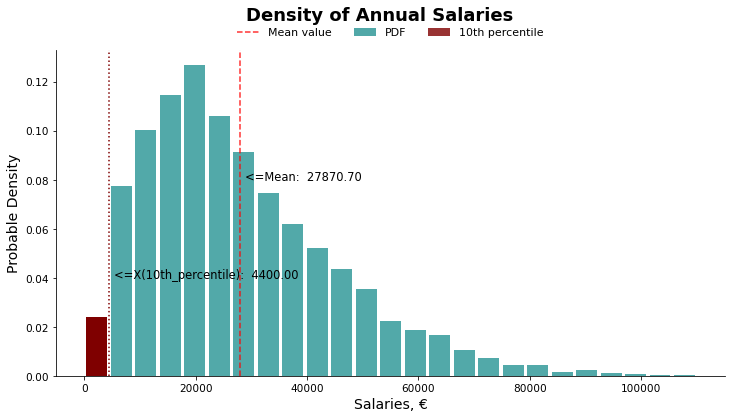

In [73]:
import numpy as np
import matplotlib.pyplot as plt


data = np.genfromtxt("./data5-1.csv")

n_bins = 25

# Generating a plotable distribution of data & storing edge values of each bin.
dist, bin_edges = np.histogram(
    data, bins=n_bins, range=[0.0, 110000.0])

# Calculating the center value & width of distributions each bin.
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_widths = bin_edges[1:] - bin_edges[:-1]

# Normalizing the distribution to obtain PDF.
pdf = dist / np.sum(dist)

# Calculating mean of distribution by summing
# center values multiplied by their density.
mean = np.sum(bin_centers*pdf)

# Calculating the cumulative distribution for X = 10th_percentile.
cumulative_dist = np.cumsum(pdf)

# Calculating values below 10th percentile.
index_below_10th = np.argmin(np.abs(cumulative_dist-0.10))
X = bin_edges[index_below_10th]

plt.figure(figsize=(12, 6))

plt.bar(bin_centers, pdf, width=0.85*bin_widths, color='teal', alpha=0.68, label='PDF')
plt.bar(bin_centers[0:index_below_10th], pdf[0:index_below_10th],
        width=0.85*bin_widths, color='maroon', alpha=0.8, label='10th percentile')
plt.axvline(mean, color='red', alpha=0.8,
            linestyle='dashed', label='Mean value')
plt.axvline(tile_10th, color='maroon',
            linestyle='dotted')
text = f'<=Mean: {mean: .2f}'
text_percentile = f'<=X(10th_percentile): {X: .2f}'
plt.text(mean+1000, y=np.mean(pdf)+0.04, s=text, fontsize=11.5)
plt.text(X+1000, y=np.mean(pdf), s=text_percentile, fontsize=11.5)

plt.xlabel('Salaries, €', fontsize=14)
plt.ylabel('Probable Density', fontsize=14)
plt.suptitle('Density of Annual Salaries',
             fontsize=18, fontweight='bold')
plt.legend(frameon=False, fontsize=11, ncols=4,
           loc='upper center', borderaxespad=-2.4)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=10.5)


In [39]:
cumulative_dist-0.10

array([-0.076  ,  0.00125,  0.10175,  0.2165 ,  0.34325,  0.44925,
        0.54075,  0.6155 ,  0.6775 ,  0.72975,  0.7735 ,  0.809  ,
        0.8315 ,  0.85025,  0.86675,  0.87725,  0.8845 ,  0.889  ,
        0.8935 ,  0.89525,  0.89775,  0.89875,  0.8995 ,  0.89975,
        0.9    ])

In [75]:
data.min()

426.0

In [76]:
data.max()

109837.0

295350290.2987575

In [81]:
np.count_nonzero(data)

4000

In [82]:
norm_dist.std()

0.04106847939722142

In [85]:
np.percentile(data, 25)

15185.5

In [86]:
np.percentile(data, 50)

24183.5

In [87]:
np.percentile(data, 70)

34237.99999999999